Instalar controlador para mysql

```
# !pip install mysql-connector-python
```



In [2]:
!pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/96/db/50f7397d0c8b013b87ad402f60892335dab6680a373c6aa583fa20c7b7a8/mysql_connector_python-8.2.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
      --------------------------------------- 10.2/527.0 kB ? eta -:--:--
     -- ---------------------------------- 30.7/527.0 kB 435.7 kB/s eta 0:00:02
     -------------------- ----------------- 286.7/527.0 kB 2.5 MB/s eta 0:00:01
     -------------------------------------  522.2/527.0 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 527.0/527.0 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/14.2 MB 33.1 MB/s eta 0:00:01
   ------------ --------------------------- 4.3/14.2 MB 45.8 MB/s eta 0:00:01
   -------------- ------------------------- 5.2/14.2 MB 41.9 MB/s eta


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Instalar pandas

```
# !pip install pandas
```



In [27]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/f0/9b/f5218b4d746491bf262f74665f17604de88387173127ce0ed1eabcddf754/pandas-2.1.2-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.1.2-cp312-cp312-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.1.2-cp312-cp312-win_amd64.whl (10.5 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Instalar pandas

```
# !pip install matplotlib
```



In [39]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d9/82/59970be41cc28cd7b7ae3ddc1d6b3891715af669ea0a0d2c244e126d3bb6/matplotlib-3.8.1-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.8.1-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.1-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl (187 kB)
Using cached cycler


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Conexión al servidor que expone a la base de datos

In [11]:
import mysql.connector

# Datos de conexión
host = "localhost"
user = "root"
password = ""
database = "investigacion"
#host = "149.100.155.52"
#user = "u342060465_bd_uniminuto"
#password = "[jY4:udq+7xu"
#database = "u342060465_bd_uniminuto"

# Establecer la conexión
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Generar consultas

### 1. Esta consulta proporciona al usuario final un resumen de los promedios de las notas definitivas de los estudiantes en un conjunto específico de materias (identificadas por sus códigos 1, 2, 3 y 4). El reporte muestra estos promedios organizados por periodo académico, permitiendo así identificar el rendimiento promedio de los estudiantes en cada una de esas materias a lo largo del tiempo. Cada fila en el resultado representa el promedio de las notas de una materia para un periodo académico en particular, brindando una visión general del desempeño a lo largo de distintos periodos para estas asignaturas específicas.

In [10]:
import pandas as pd

# Crear un cursor para ejecutar consultas
cursor = connection.cursor()

# Consulta SQL
query = """
    SELECT
      m.materia AS Materia,
      ROUND(AVG(CASE WHEN ma.periodo = '2020A' THEN ma.nota_definitiva ELSE NULL END), 2) AS '2020A',
      ROUND(AVG(CASE WHEN ma.periodo = '2020B' THEN ma.nota_definitiva ELSE NULL END), 2) AS '2020B',
      ROUND(AVG(CASE WHEN ma.periodo = '2021A' THEN ma.nota_definitiva ELSE NULL END), 2) AS '2021A',
      ROUND(AVG(CASE WHEN ma.periodo = '2021B' THEN ma.nota_definitiva ELSE NULL END), 2) AS '2021B',
      ROUND(AVG(CASE WHEN ma.periodo = '2022A' THEN ma.nota_definitiva ELSE NULL END), 2) AS '2022A',
      ROUND(AVG(CASE WHEN ma.periodo = '2022B' THEN ma.nota_definitiva ELSE NULL END), 2) AS '2022B'
  FROM materia m
  LEFT JOIN matricula ma ON m.id = ma.materia_id
  GROUP BY m.materia;
"""

# Ejecutar la consulta
cursor.execute(query)

# Obtener los resultados de la consulta
result = cursor.fetchall()

# Crear un DataFrame de Pandas con los resultados y definir los nombres de las columnas
df = pd.DataFrame(result, columns=['Materia', '2020A', '2020B', '2021A', '2021B', '2022A', '2022B'])

# Cerrar la conexión
connection.close()

# Mostrar el DataFrame resultante
print(df)


                                              Materia  2020A  2020B  2021A  \
0                Análisis de Algoritmos y Complejidad    NaN    NaN    NaN   
1               Arquitectura de Computadoras Modernas    NaN    NaN    NaN   
2             Bioinformática y Genómica Computacional    NaN    NaN    NaN   
3                  Ciberseguridad y Ética Informática    NaN    NaN    NaN   
4                              Computación en la Nube    NaN    NaN    NaN   
5                        Computación Gráfica Avanzada    NaN    NaN    NaN   
6                           Desarrollo de Videojuegos    NaN    NaN    NaN   
7                     Diseño de Interfaces de Usuario    NaN    NaN    NaN   
8       Estructuración de Bases de Datos Relacionales   1.30   1.87   3.33   
9        Estructuración de Proyectos de Investigación   2.27   2.10   2.06   
10                  Gestión de Proyectos Tecnológicos    NaN    NaN    NaN   
11                    Ingeniería de Software Avanzada    NaN    

In [34]:
import pandas as pd

# Crear un cursor para ejecutar consultas
cursor = connection.cursor()

# Consulta SQL
query = """
    SELECT
        m.materia AS Materia,
        ROUND(COALESCE(AVG(nota_2020A), 0), 2) AS '2020A',
        ROUND(COALESCE(AVG(nota_2020B), 0), 2) AS '2020B',
        ROUND(COALESCE(AVG(nota_2021A), 0), 2) AS '2021A',
        ROUND(COALESCE(AVG(nota_2021B), 0), 2) AS '2021B',
        ROUND(COALESCE(AVG(nota_2022A), 0), 2) AS '2022A',
        ROUND(COALESCE(AVG(nota_2022B), 0), 2) AS '2022B'
    FROM materia m
    LEFT JOIN (
        SELECT
            materia_id,
            AVG(CASE WHEN periodo = '2020A' THEN nota_definitiva ELSE NULL END) AS nota_2020A,
            AVG(CASE WHEN periodo = '2020B' THEN nota_definitiva ELSE NULL END) AS nota_2020B,
            AVG(CASE WHEN periodo = '2021A' THEN nota_definitiva ELSE NULL END) AS nota_2021A,
            AVG(CASE WHEN periodo = '2021B' THEN nota_definitiva ELSE NULL END) AS nota_2021B,
            AVG(CASE WHEN periodo = '2022A' THEN nota_definitiva ELSE NULL END) AS nota_2022A,
            AVG(CASE WHEN periodo = '2022B' THEN nota_definitiva ELSE NULL END) AS nota_2022B
        FROM matricula
        GROUP BY materia_id
    ) ma ON m.id = ma.materia_id
    GROUP BY m.materia;
"""

# Ejecutar la consulta
cursor.execute(query)

# Obtener los resultados de la consulta
result = cursor.fetchall()

# Crear un DataFrame de Pandas con los resultados y definir los nombres de las columnas
df = pd.DataFrame(result, columns=['Materia', '2020A', '2020B', '2021A', '2021B', '2022A', '2022B'])

# Cerrar la conexión
connection.close()

# Mostrar el DataFrame resultante
print(df)


                                              Materia  2020A  2020B  2021A  \
0                Análisis de Algoritmos y Complejidad   0.00   0.00   0.00   
1               Arquitectura de Computadoras Modernas   0.00   0.00   0.00   
2             Bioinformática y Genómica Computacional   0.00   0.00   0.00   
3                  Ciberseguridad y Ética Informática   0.00   0.00   0.00   
4                              Computación en la Nube   0.00   0.00   0.00   
5                        Computación Gráfica Avanzada   0.00   0.00   0.00   
6                           Desarrollo de Videojuegos   0.00   0.00   0.00   
7                     Diseño de Interfaces de Usuario   0.00   0.00   0.00   
8       Estructuración de Bases de Datos Relacionales   2.20   2.54   1.14   
9        Estructuración de Proyectos de Investigación   2.19   0.72   1.92   
10                  Gestión de Proyectos Tecnológicos   0.00   0.00   0.00   
11                    Ingeniería de Software Avanzada   0.00   0

In [12]:
import pandas as pd

# Crear un cursor para ejecutar consultas
cursor = connection.cursor()

# Consulta SQL
query = """
    SELECT
        m.materia AS Materia,
        ROUND(COALESCE(AVG(CASE WHEN ma.periodo = '2020A' THEN ma.nota_definitiva END), 0), 2) AS '2020A',
        ROUND(COALESCE(AVG(CASE WHEN ma.periodo = '2020B' THEN ma.nota_definitiva END), 0), 2) AS '2020B',
        ROUND(COALESCE(AVG(CASE WHEN ma.periodo = '2021A' THEN ma.nota_definitiva END), 0), 2) AS '2021A',
        ROUND(COALESCE(AVG(CASE WHEN ma.periodo = '2021B' THEN ma.nota_definitiva END), 0), 2) AS '2021B',
        ROUND(COALESCE(AVG(CASE WHEN ma.periodo = '2022A' THEN ma.nota_definitiva END), 0), 2) AS '2022A',
        ROUND(COALESCE(AVG(CASE WHEN ma.periodo = '2022B' THEN ma.nota_definitiva END), 0), 2) AS '2022B'
    FROM materia m
    LEFT JOIN matricula ma ON m.id = ma.materia_id
    WHERE m.id IN (1, 2, 3, 4)
    GROUP BY m.materia;
"""

# Ejecutar la consulta
cursor.execute(query)

# Obtener los resultados de la consulta
result = cursor.fetchall()

# Crear un DataFrame de Pandas con los resultados y definir los nombres de las columnas
df = pd.DataFrame(result, columns=['Materia', '2020A', '2020B', '2021A', '2021B', '2022A', '2022B'])

# Cerrar la conexión
connection.close()

# Mostrar el DataFrame resultante
print(df)


                                         Materia  2020A  2020B  2021A  2021B  \
0  Estructuración de Bases de Datos Relacionales   1.30   1.87   3.33   2.60   
1   Estructuración de Proyectos de Investigación   2.27   2.10   2.06   2.90   
2                             Programación Móvil   2.34   1.33   2.18   2.97   
3                          Sistemas Distribuidos   1.67   2.74   2.92   3.33   

   2022A  2022B  
0   1.95   1.68  
1   2.27   1.81  
2   2.62   1.50  
3   2.30   2.77  


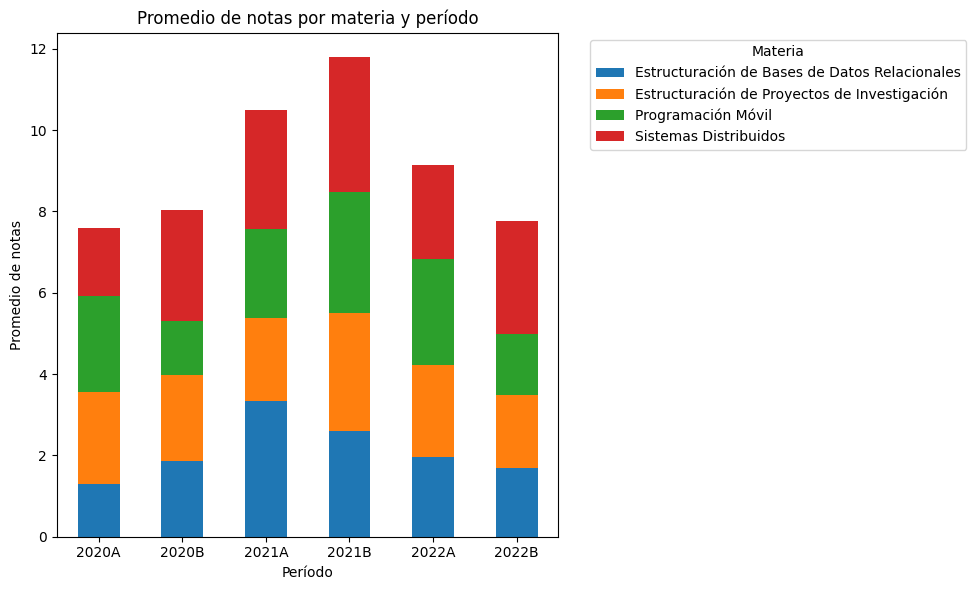

In [13]:
import matplotlib.pyplot as plt

# Gráfico de barras apiladas
df.set_index('Materia').T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Promedio de notas por materia y período')
plt.xlabel('Período')
plt.ylabel('Promedio de notas')
plt.legend(title='Materia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


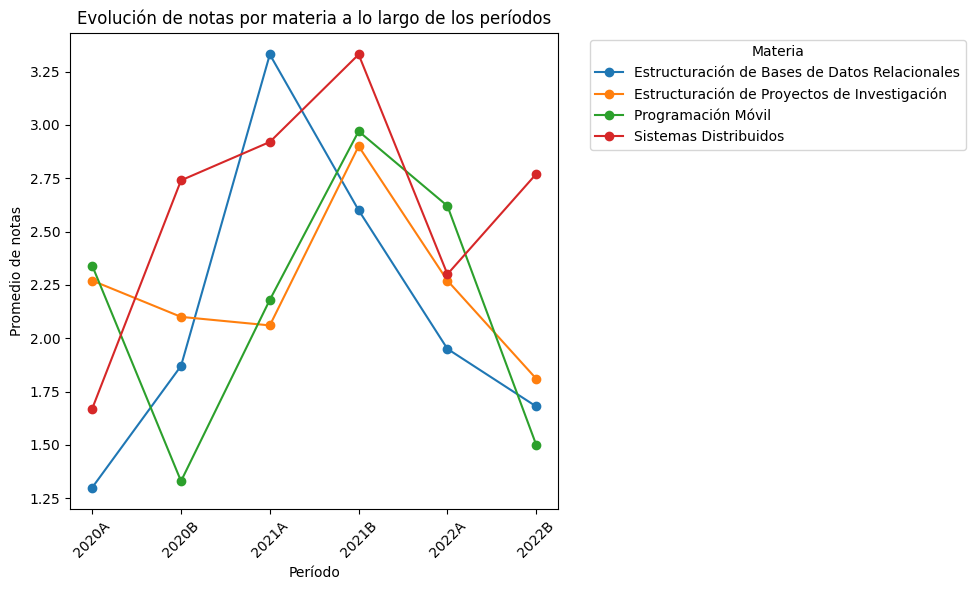

In [14]:
# Graficar evolución de las materias a lo largo de diferentes períodos
df.set_index('Materia').T.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Evolución de notas por materia a lo largo de los períodos')
plt.xlabel('Período')
plt.ylabel('Promedio de notas')
plt.legend(title='Materia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


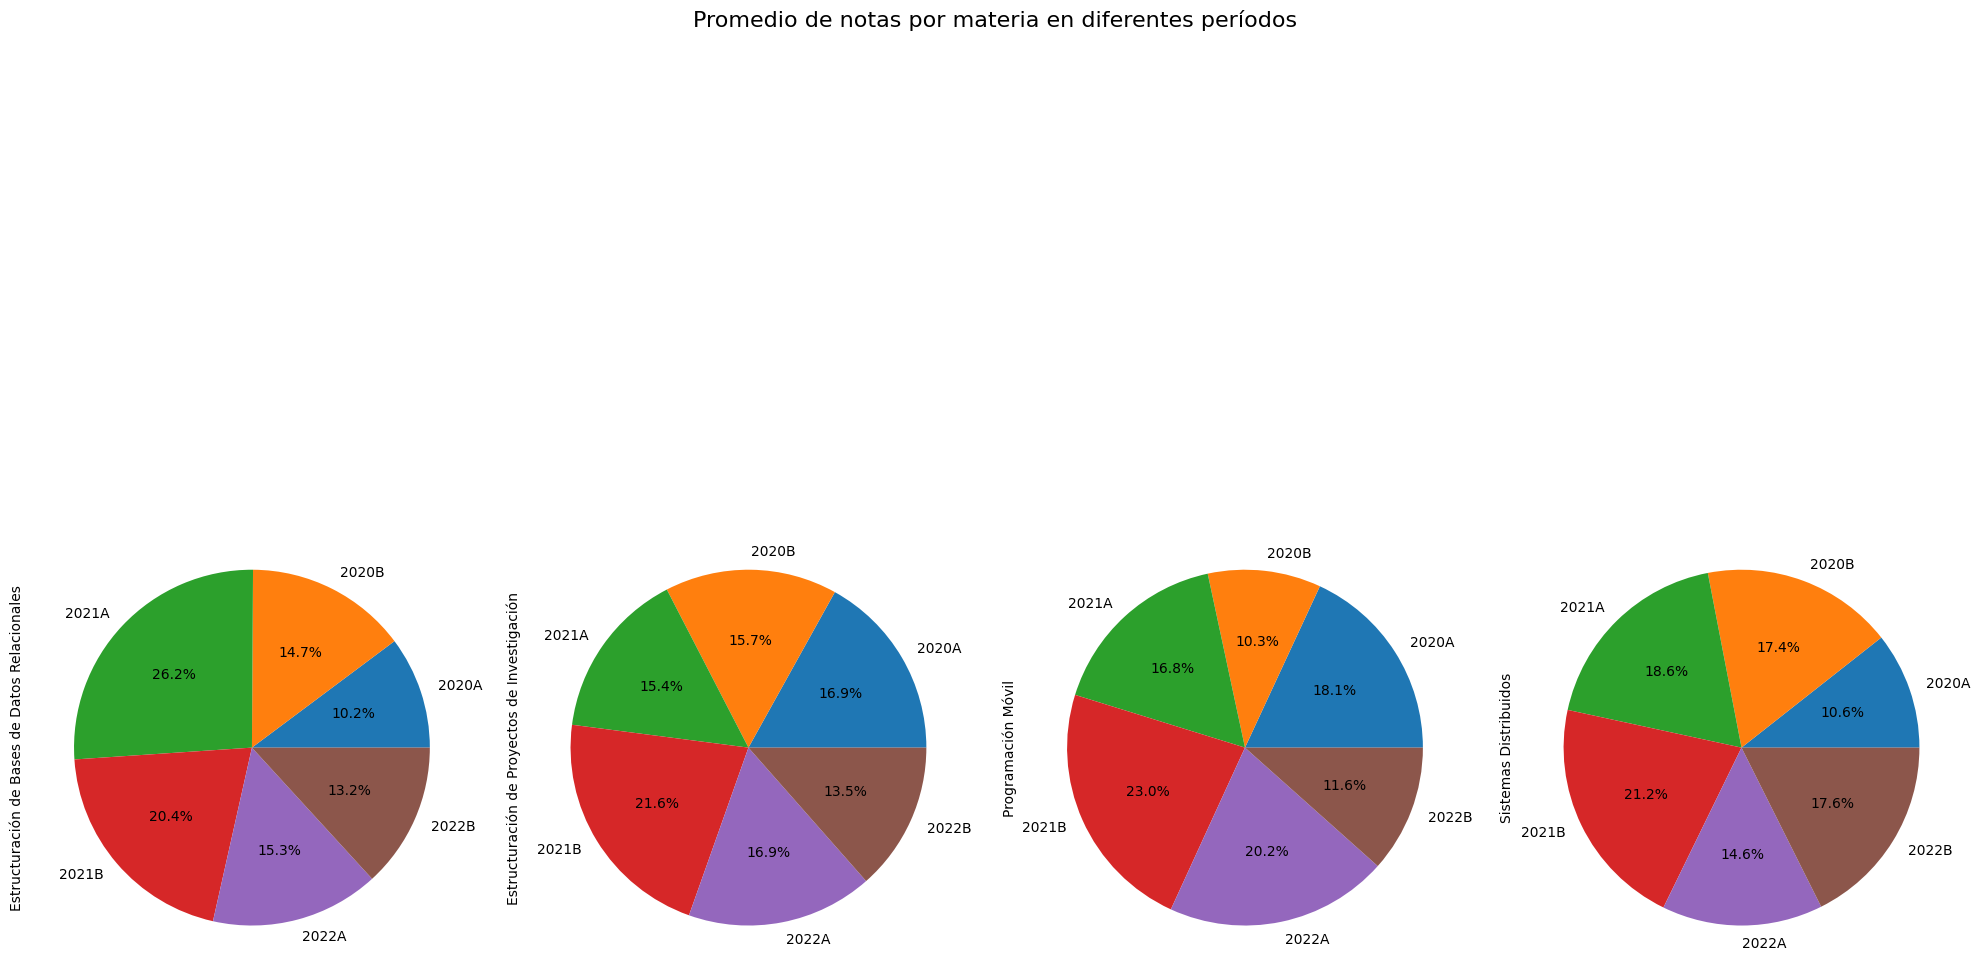

In [15]:
# Graficar promedio de notas por materia en un gráfico de pastel
df.set_index('Materia').T.plot(kind='pie', subplots=True, figsize=(20, 15), legend=False, autopct='%1.1f%%')
plt.suptitle('Promedio de notas por materia en diferentes períodos', fontsize=16)
plt.tight_layout()
plt.show()
